***derin öğrenmeye giriş***

* girdi -> ağırlıklar -> aktivasyon -> çıktı
* çok sayıda nöron ve katmandan oluşur.
*italicized text*
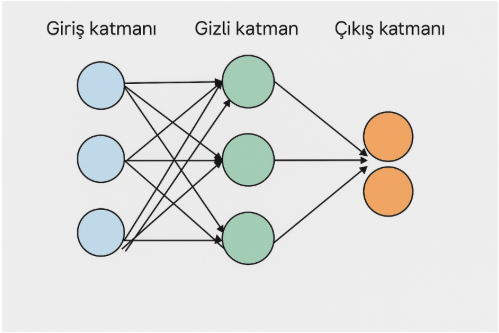

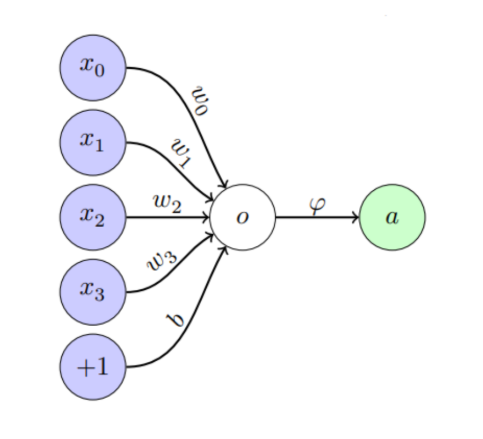

ağırlık ile girdiler çarpılarak toplanır.
* z = w1x1 + w2x2 + .. + wnxn + b     -->  a = f(z)
  * xi : girişler
  * wi : ağırlıklar
  * b : bias
  * f(z) : aktivasyon fonksiyonu (ReLU ,sigmoid..)

burdaki w ağrılık değerleri ilk başta rastgele olarak seçilir. Sonra modeli çalıştırdıktan sonra öğrene öğrene ağırlık değerleri kendini günceller ve en son doğru halini alır.

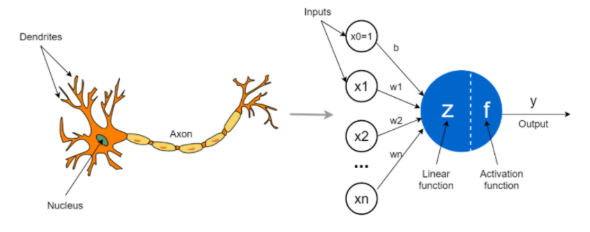

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* sinir ağı eğitilirken , ağırlıklar geri yayılım (backpropagation) algoritması ile güncellenir.
* aktivasyon fonk. türevi(gradyanı) her ağırlığın ne kadar güncelleneceğini belirler.
* sigmoid akt. fonk. ikili sınıflandırmalarda(threshold kullanılır) tercih edilir.
* çoklu sınıflandırmalarda softmax aktivasyon fonks. kullanılır.


* aktıvasyon fonks;
  * sigmoid
  * softmax (genellikle son katmanda kullanılır)
  * relu
  * tanh
  * leaky relu , elu
  * gelu


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer

model = Sequential([
    InputLayer(shape = (10,0)),
    Dense(units = 20 , activation = 'relu'),
    Dense(units = 3 , activation = 'softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10, 20)         │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 3)          │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

loss funct : modeli tahmini ile gerçek değer arasındaki fark ile ölçülür.

burdaki fark ağırlıkların nasıl güncelleneceğini belirler.

backpropagation ile kullanılır

loss functions :
* mean squared error
* binary crossentropy
* categorical crossentropy

optimizasyon algoritmaları:
* SGD (stochastic gradient distenct)
* Adam
* RMSprop, Adagrad

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer

model = Sequential([
    InputLayer(shape = (4,0)),
    Dense(units = 20 , activation = 'relu'),
    Dense(units = 3 , activation = 'softmax'),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4, 20)          │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4, 3)           │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train,y

(array([[-0.81140951, -0.75790523,  0.03293821,  0.23803333],
        [-1.05123498,  0.66316708, -1.39915788, -1.38645954],
        [-1.05123498, -2.41582293, -0.19619716, -0.30346429],
        [ 0.02797964, -0.04736908,  0.72034433,  0.77953095],
        [-1.65079866, -1.70528678, -1.45644173, -1.25108514],
        [-0.4516713 ,  2.79477555, -1.39915788, -1.38645954],
        [-0.57158404,  1.61054862, -1.34187404, -1.38645954],
        [-0.33175857, -0.04736908,  0.1475059 ,  0.10265892],
        [-0.57158404,  2.08423939, -1.22730635, -1.11571073],
        [-0.4516713 , -1.70528678,  0.09022205,  0.10265892],
        [ 2.42623434,  1.84739401,  1.4650343 ,  1.05027977],
        [-0.57158404, -0.04736908,  0.37664127,  0.37340774],
        [-0.4516713 , -1.46844139, -0.02434563, -0.16808989],
        [-1.05123498, -1.70528678, -0.31076485, -0.30346429],
        [-0.4516713 , -1.46844139, -0.08162948, -0.30346429],
        [-1.17114771,  1.37370324, -1.39915788, -1.52183395],
        

1. regularization;
    * l1 ve l2 reg
    * ağırlıklara penalty(ceza) uygular
    * l1 : ağırlıkların toplam mutlak değeri(lasso)
    * l2 : ağırlıkların karelerinin toplamı (ridge)

2. dropout
    * nöronları geçici olarak kapatma
    * overfitting i engellemek için kullanılır

* epoch sayısı
* batch size
* learning rate

* Model, eğitim verisi ile öğrenir.
* Ancak yalnızca eğitim verisiyle test edilirse:
* Gerçek başarı ölçülemez.
* Aşırı öğrenme (overfitting) fark edilmez.

Bu nedenle:

Eğitim verisi: Öğrenme için

Doğrulama verisi (validation): Öğrenme sırasında değerlendirme için

    * ara kontroller için kullanılır.
    * bakalım yaptığımız ağırlık güncellemeleri öğrenme sırasında işe yarıyor mu ?

Test verisi: Son değerlendirme için

Amaç: Modelin genelleme başarısını ölçmek


****k-fold cross validation nedir ?

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Veri yükleme
data = load_iris()
X, y = data.data, data.target

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print("Ortalama Doğruluk:", np.mean(scores))

Ortalama Doğruluk: 0.9733333333333334
